### Import libraries

In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM,GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

# Data processing


In [2]:
import pandas as pd
nov = pd.read_csv('NovAll.csv')
apr =pd.read_csv('AprilAll.csv')
nov_apr =pd.read_csv('April_Nov.csv')

In [3]:
nov['Time1'] = nov['Time'].str.replace('_', '')
apr['Time1'] = apr['Time'].str.replace('_', '')
nov_apr['Time1'] = nov_apr['Time'].str.replace('_', '')

In [4]:
nov['time_corrected']= pd.to_datetime(nov['Time1'], format='%Y%m%d%H', errors='coerce')
apr['time_corrected']= pd.to_datetime(apr['Time1'], format='%Y%m%d%H', errors='coerce')
nov_apr['time_corrected']= pd.to_datetime(nov_apr['Time1'], format='%Y%m%d%H', errors='coerce')

In [5]:
nov.set_index('time_corrected', inplace=True)
apr.set_index('time_corrected', inplace=True)
nov_apr.set_index('time_corrected', inplace=True)

In [6]:
nov = nov.drop(['Time','Time1'],axis=1)
apr = apr.drop(['Time','Time1'],axis=1)
nov_apr = nov_apr.drop(['Time','Time1'],axis=1)

In [7]:
print(nov.isnull().sum())
print(apr.isnull().sum())
print(nov_apr.isnull().sum())

traffic information    0
RP                     0
dtype: int64
traffic information    0
RP                     0
dtype: int64
traffic information    0
RP                     0
dtype: int64


In [8]:
nov.columns = nov.columns.str.strip()
apr.columns = apr.columns.str.strip()
nov_apr.columns = nov_apr.columns.str.strip()

# Part B

# SVM, DNN, RBF

## Univariate SVM

In [9]:
nov_apr.head()

,traffic information,RP
time_corrected,,
2015-04-01 00:00:00,78.6,91.7
2015-04-01 01:00:00,80.0,93.7
2015-04-01 02:00:00,80.1,91.4
2015-04-01 03:00:00,80.0,92.7
2015-04-01 04:00:00,79.0,93.5


In [10]:
nov_apr_1 = nov_apr.copy()

In [11]:
name=[]
name1=[]
v=[]
v1=[]
names=[]
name1s=[]
vs=[]
v1s=[]

In [12]:

nov_apr_1 = nov_apr_1.reset_index()
nov_apr_1['hour'] = nov_apr_1['time_corrected'].dt.hour
nov_apr_1['WEEKDAY'] = (((nov_apr_1.time_corrected).dt.dayofweek) // 5 == 1).astype(float)

In [13]:
nov_apr_uni = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_uni[:1200]
test =nov_apr_uni[1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 


(1200, 2) (1200,) (188, 2) (188,)


In [14]:
#fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_X, train_y)

SVR()

In [15]:
predict = regressor.predict(test_X)

In [16]:
mae_svm_nov_apr_uni = mean_absolute_error(test_y, predict)
name.append('SVM_MAE')
v.append(mae_svm_nov_apr_uni)
print (mae_svm_nov_apr_uni)

1.5594998767033987


In [17]:
mse_svm_nov_apr_uni = ((test_y-predict)**2).mean()

In [18]:
name.append('SVM_MSE')
v.append(mse_svm_nov_apr_uni)
print (mse_svm_nov_apr_uni)


4.221012384873484


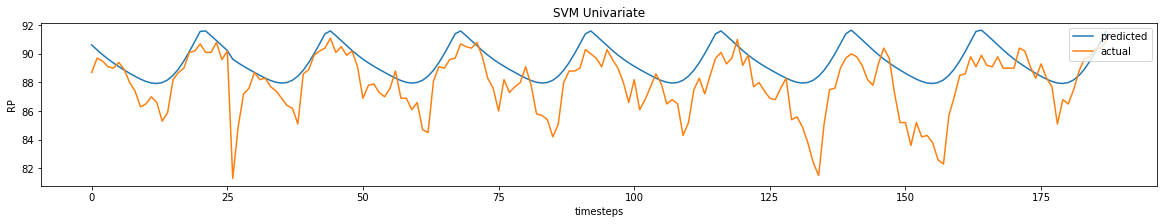

In [19]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predict)
plt.plot(test_y.values)
plt.title('SVM Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# Multivariate SVM

In [20]:
nov_apr_multi = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_multi [:1200]
test =nov_apr_multi [1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['traffic information','hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['traffic information','hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 3) (1200,) (188, 3) (188,)


In [21]:
#fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_X, train_y)

SVR()

In [22]:
predict = regressor.predict(test_X)

In [23]:
from sklearn.metrics import mean_absolute_error
mae_svm_nov_apr_multi=mean_absolute_error(test_y, predict)

In [24]:
name1.append('MULTI_SVM_MAE')
v1.append(mae_svm_nov_apr_multi)
print (mae_svm_nov_apr_multi)



1.6452997544508723


In [25]:
mse_svm_nov_apr_multi = mean_squared_error(test_y, predict)

In [26]:
name1.append('MULTI_SVM_MSE')
v1.append(mse_svm_nov_apr_multi)
print (mse_svm_nov_apr_multi)



4.876176039479171


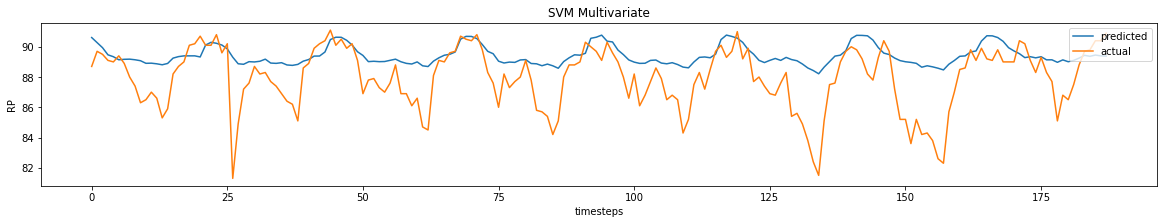

In [27]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predict)
plt.plot(test_y.values)
plt.title('SVM Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# DNN

## Univariate

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [29]:
nov_apr_uni = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_uni[:1200]
test =nov_apr_uni[1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 2) (1200,) (188, 2) (188,)


1. Define a sequential model
2. Add some dense layers
3. Use ‘relu’ as the activation function for the hidden layers
4. Use a ‘normal’ initializer as the kernal_intializer
(Initializers define the way to set the initial random weights of Keras layers.)
5. We will use mean_absolute_error as a loss function
6. Define the output layer with only one node
7. Use ‘linear ’as the activation function for the output layer



Creating DNN architechure with 1 input layer with 128 neurorns for provinding the train data and 3 hidden layers.
As it is regression there is only 1 neuron at the output. The optimization is done using ADAM optimizer with mean absolute error as loss function

In [30]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


Define a checkpoint callback :

In [31]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]


 Train the model :

In [32]:
history = NN_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
26/30 [=========================>....] - ETA: 0s - loss: 73.3707 - mean_absolute_error: 73.3707
Epoch 00001: val_loss improved from inf to 43.97656, saving model to Weights-001--43.97656.hdf5
30/30 [==============================] - 1s 33ms/step - loss: 69.0402 - mean_absolute_error: 69.0402 - val_loss: 43.9766 - val_mean_absolute_error: 43.9766
Epoch 2/100
30/30 [==============================] - ETA: 0s - loss: 35.7998 - mean_absolute_error: 35.7998
Epoch 00002: val_loss improved from 43.97656 to 31.93129, saving model to Weights-002--31.93129.hdf5
30/30 [==============================] - 0s 8ms/step - loss: 35.7998 - mean_absolute_error: 35.7998 - val_loss: 31.9313 - val_mean_absolute_error: 31.9313
Epoch 3/100
25/30 [========================>.....] - ETA: 0s - loss: 31.1212 - mean_absolute_error: 31.1212
Epoch 00003: val_loss improved from 31.93129 to 23.06411, saving model to Weights-003--23.06411.hdf5
30/30 [==============================] - 0s 7ms/step - loss: 30.121

26/30 [=========================>....] - ETA: 0s - loss: 1.4242 - mean_absolute_error: 1.4242
Epoch 00052: val_loss did not improve from 1.09489
30/30 [==============================] - 0s 6ms/step - loss: 1.3851 - mean_absolute_error: 1.3851 - val_loss: 2.7727 - val_mean_absolute_error: 2.7727
Epoch 53/100
23/30 [======================>.......] - ETA: 0s - loss: 1.4812 - mean_absolute_error: 1.4812
Epoch 00053: val_loss did not improve from 1.09489
30/30 [==============================] - 0s 10ms/step - loss: 1.4288 - mean_absolute_error: 1.4288 - val_loss: 2.8188 - val_mean_absolute_error: 2.8188
Epoch 54/100
25/30 [========================>.....] - ETA: 0s - loss: 1.4219 - mean_absolute_error: 1.4219
Epoch 00054: val_loss did not improve from 1.09489
30/30 [==============================] - 0s 10ms/step - loss: 1.3838 - mean_absolute_error: 1.3838 - val_loss: 3.1243 - val_mean_absolute_error: 3.1243
Epoch 55/100
25/30 [========================>.....] - ETA: 0s - loss: 1.3973 - mean_

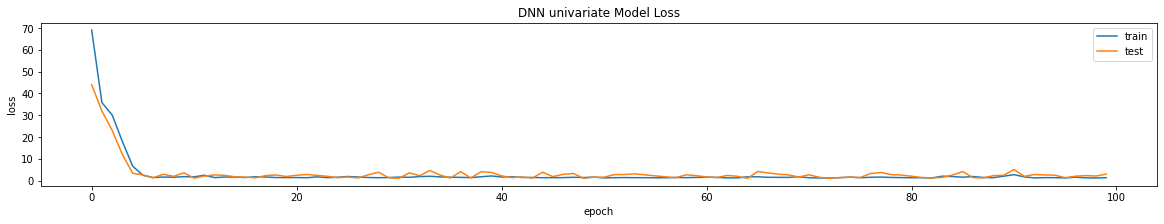

In [33]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN univariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [35]:
# Load wights file of the best model :/content/Weights-049--0.01040.hdf5
wights_file = 'Weights-065--1.05023.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [36]:
predictions = NN_model.predict(test_X)

In [37]:
name.append('DNN_Univariate_MAE')
v.append(metrics.mean_absolute_error(test_y, predictions.ravel()))


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions.ravel())) 


Mean Absolute Error: 1.0434764293914147


In [38]:
name.append('DNN_Univariate_MSE')
v.append(metrics.mean_squared_error(test_y, predictions.ravel()))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predictions.ravel())) 

Mean Squared Error: 1.8054373870125702


In [39]:
DNN_univariate_mae =  metrics.mean_absolute_error(test_y*100, predictions.ravel()*100)

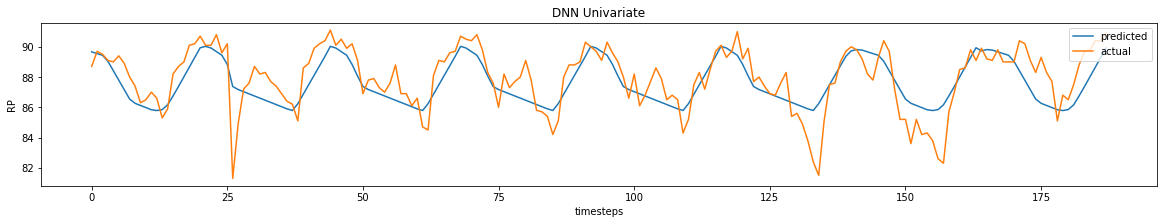

In [40]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predictions)
plt.plot(test_y.values)
plt.title('DNN Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [41]:
nov_apr_multi = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200 
train = nov_apr_multi [:1200]
test =nov_apr_multi [1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['traffic information','hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['traffic information','hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 3) (1200,) (188, 3) (188,)


In [42]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 165,377
Trainable params: 165,377
Non-trainable params: 0
_________________________________________________________________


In [43]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weightsmulti-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [44]:
history = NN_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
16/30 [===============>..............] - ETA: 0s - loss: 67.3641 - mean_absolute_error: 67.3641
Epoch 00001: val_loss improved from inf to 9.95914, saving model to Weightsmulti-001--9.95914.hdf5
30/30 [==============================] - 0s 11ms/step - loss: 40.3999 - mean_absolute_error: 40.3999 - val_loss: 9.9591 - val_mean_absolute_error: 9.9591
Epoch 2/100
30/30 [==============================] - ETA: 0s - loss: 3.7660 - mean_absolute_error: 3.7660
Epoch 00002: val_loss improved from 9.95914 to 1.98791, saving model to Weightsmulti-002--1.98791.hdf5
30/30 [==============================] - 0s 8ms/step - loss: 3.7660 - mean_absolute_error: 3.7660 - val_loss: 1.9879 - val_mean_absolute_error: 1.9879
Epoch 3/100
25/30 [========================>.....] - ETA: 0s - loss: 2.0482 - mean_absolute_error: 2.0482
Epoch 00003: val_loss improved from 1.98791 to 1.97280, saving model to Weightsmulti-003--1.97280.hdf5
30/30 [==============================] - 0s 10ms/step - loss: 1.9076 -

Epoch 27/100
29/30 [============================>.] - ETA: 0s - loss: 1.3583 - mean_absolute_error: 1.3583
Epoch 00027: val_loss did not improve from 1.07621
30/30 [==============================] - 0s 7ms/step - loss: 1.3651 - mean_absolute_error: 1.3651 - val_loss: 1.6108 - val_mean_absolute_error: 1.6108
Epoch 28/100
25/30 [========================>.....] - ETA: 0s - loss: 1.7525 - mean_absolute_error: 1.7525
Epoch 00028: val_loss did not improve from 1.07621
30/30 [==============================] - 0s 8ms/step - loss: 1.6746 - mean_absolute_error: 1.6746 - val_loss: 2.4348 - val_mean_absolute_error: 2.4348
Epoch 29/100
23/30 [======================>.......] - ETA: 0s - loss: 1.4013 - mean_absolute_error: 1.4013
Epoch 00029: val_loss did not improve from 1.07621
30/30 [==============================] - 0s 6ms/step - loss: 1.3828 - mean_absolute_error: 1.3828 - val_loss: 2.2528 - val_mean_absolute_error: 2.2528
Epoch 30/100
29/30 [============================>.] - ETA: 0s - loss: 1.4

29/30 [============================>.] - ETA: 0s - loss: 1.3255 - mean_absolute_error: 1.3255
Epoch 00079: val_loss did not improve from 1.03982
30/30 [==============================] - 0s 8ms/step - loss: 1.3186 - mean_absolute_error: 1.3186 - val_loss: 4.1243 - val_mean_absolute_error: 4.1243
Epoch 80/100
23/30 [======================>.......] - ETA: 0s - loss: 1.3646 - mean_absolute_error: 1.3646
Epoch 00080: val_loss did not improve from 1.03982
30/30 [==============================] - 0s 9ms/step - loss: 1.3495 - mean_absolute_error: 1.3495 - val_loss: 2.4420 - val_mean_absolute_error: 2.4420
Epoch 81/100
21/30 [====================>.........] - ETA: 0s - loss: 1.5062 - mean_absolute_error: 1.5062
Epoch 00081: val_loss did not improve from 1.03982
30/30 [==============================] - 0s 9ms/step - loss: 1.4539 - mean_absolute_error: 1.4539 - val_loss: 1.7426 - val_mean_absolute_error: 1.7426
Epoch 82/100
22/30 [=====================>........] - ETA: 0s - loss: 1.4264 - mean_ab

In [45]:
# Load wights file of the best model :/content//content/Weightsmulti-038--0.00989.hdf5
wights_file = 'Weightsmulti-097--1.03967.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae'])

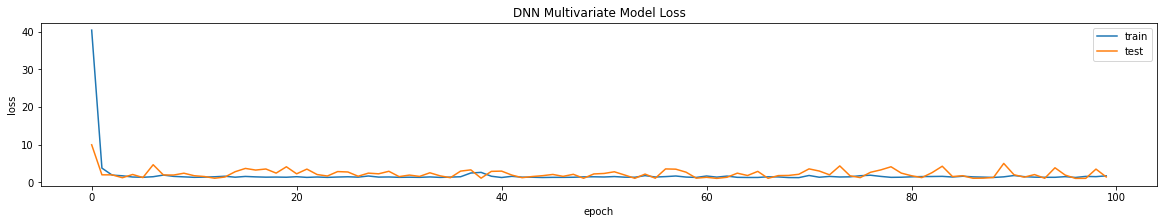

In [46]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Multivariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [47]:
predictions = NN_model.predict(test_X)

In [48]:
name1.append('DNN_Multivariate_MAE')
v1.append(metrics.mean_absolute_error(test_y, predictions.ravel()))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions.ravel())) 

Mean Absolute Error: 0.9954616384303318


In [49]:
name1.append('DNN_Multivariate_MSE')
v1.append(metrics.mean_squared_error(test_y, predictions.ravel()))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predictions.ravel())) 

Mean Squared Error: 1.6575957697242178


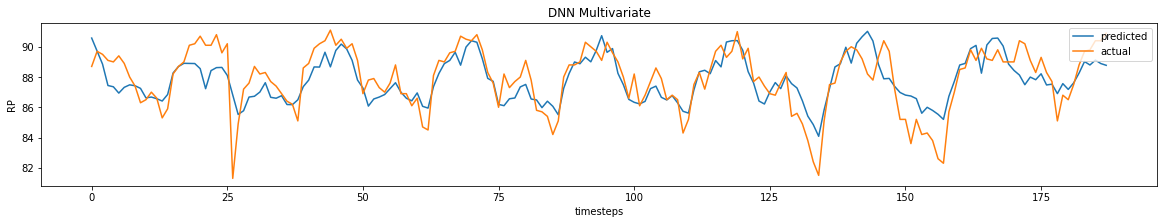

In [50]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predictions)
plt.plot(test_y.values)
plt.title('DNN Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# GRU


GRU is a type of RNN.
GRU’s were created as the solution to short-term memory.
They have internal mechanisms called gates that can regulate the flow of information.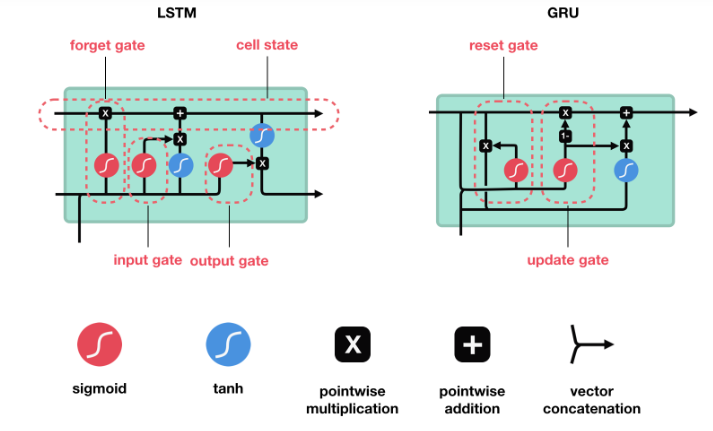

These gates can learn which data in a sequence is important to keep or throw away. By doing that, it can pass relevant information down the long chain of sequences to make predictions. Almost all state of the art results based on recurrent neural networks are achieved with these two networks. LSTM’s and GRU’s can be found in speech recognition, speech synthesis, and text generation. You can even use them to generate captions for videos.

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

## Univariate

In [51]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [52]:
nov_apr.head()

,traffic information,RP
time_corrected,,
2015-04-01 00:00:00,78.6,91.7
2015-04-01 01:00:00,80.0,93.7
2015-04-01 02:00:00,80.1,91.4
2015-04-01 03:00:00,80.0,92.7
2015-04-01 04:00:00,79.0,93.5


In [53]:
## resampling of data over hour for Nov
nov_apr_resample = nov_apr.resample('h').mean() 
nov_apr_resample.shape

(4296, 2)

In [54]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = nov_apr_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed_nov_apr = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
print(reframed_nov_apr.head())

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.613333   0.728571  0.653333  0.728571
2   0.653333   0.728571  0.653333  0.714286
3   0.653333   0.714286  0.600000  0.628571
4   0.600000   0.628571  0.560000  0.685714
5   0.560000   0.685714  0.373333  0.557143


In [55]:
reframed_nov_apr_uni = reframed_nov_apr.drop(['var1(t-1)','var1(t)'],axis=1)

In [56]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [57]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mae', optimizer='adam')

print ('model compiled')

model compiled


In [58]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Epoch 1/20
3/3 [==============================] - 1s 381ms/step - loss: 0.6275 - val_loss: 0.6578
Epoch 2/20
3/3 [==============================] - 0s 31ms/step - loss: 0.5614 - val_loss: 0.5835
Epoch 3/20
3/3 [==============================] - 0s 31ms/step - loss: 0.4903 - val_loss: 0.5018
Epoch 4/20
3/3 [==============================] - 0s 32ms/step - loss: 0.4107 - val_loss: 0.4105
Epoch 5/20
3/3 [==============================] - 0s 29ms/step - loss: 0.3243 - val_loss: 0.3070
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 0.2284 - val_loss: 0.1917
Epoch 7/20
3/3 [==============================] - 0s 28ms/step - loss: 0.1335 - val_loss: 0.0861
Epoch 8/20
3/3 [==============================] - 0s 29ms/step - loss: 0.0943 - val_loss: 0.0764
Epoch 9/20
3/3 [==============================] - 0s 29ms/step - loss: 0.1335 - val_loss: 0.0999
Epoch 10/20
3/3 [==============================] - 0s 34ms/step - loss: 0.1447 - val_loss: 0.0743
Epoch 11/20
3/3 [===========

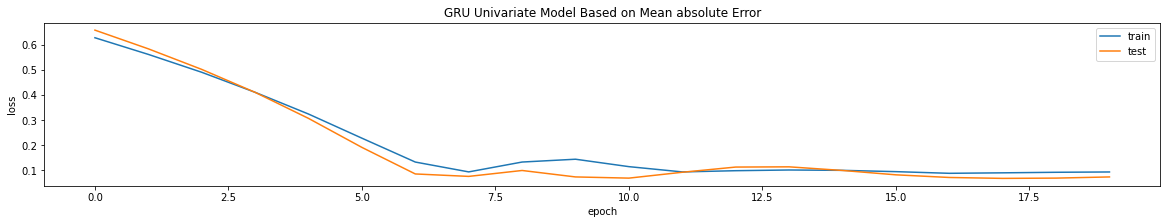

In [59]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Univariate Model Based on Mean absolute Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [60]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_univariate = mean_absolute_error(inv_y, inv_yhat)
mae_GRU_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('GRU_Univariate_MAE (When loss=mae)')
v.append(mae_GRU_univariate)
name.append('GRU_Univariate_MSE (When loss=mae)')
v.append(mae_GRU_univariate1)
print('Test MAE: %.5f' % mae_GRU_univariate)
print('Test MSE: %.5f' % mae_GRU_univariate1)

Test MAE: 0.55724
Test MSE: 0.48535


In [61]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [62]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

model compiled


In [63]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Epoch 1/20
3/3 [==============================] - 1s 400ms/step - loss: 0.4414 - val_loss: 0.4659
Epoch 2/20
3/3 [==============================] - 0s 35ms/step - loss: 0.3508 - val_loss: 0.3647
Epoch 3/20
3/3 [==============================] - 0s 32ms/step - loss: 0.2695 - val_loss: 0.2726
Epoch 4/20
3/3 [==============================] - 0s 34ms/step - loss: 0.1949 - val_loss: 0.1896
Epoch 5/20
3/3 [==============================] - 0s 38ms/step - loss: 0.1310 - val_loss: 0.1180
Epoch 6/20
3/3 [==============================] - 0s 124ms/step - loss: 0.0766 - val_loss: 0.0619
Epoch 7/20
3/3 [==============================] - 0s 51ms/step - loss: 0.0392 - val_loss: 0.0250
Epoch 8/20
3/3 [==============================] - 0s 45ms/step - loss: 0.0184 - val_loss: 0.0092
Epoch 9/20
3/3 [==============================] - 0s 42ms/step - loss: 0.0149 - val_loss: 0.0096
Epoch 10/20
3/3 [==============================] - 0s 43ms/step - loss: 0.0231 - val_loss: 0.0142
Epoch 11/20
3/3 [==========

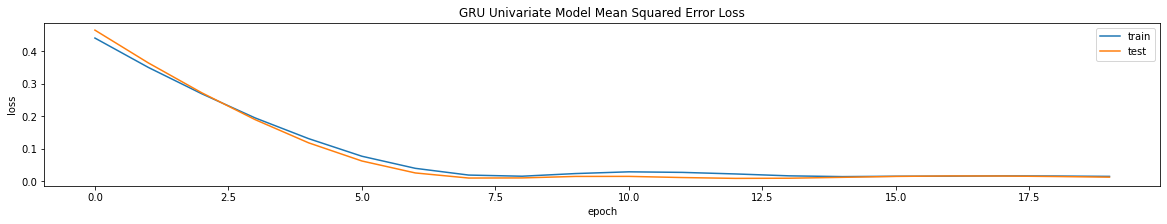

In [64]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Univariate Model Mean Squared Error Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [65]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_univariate = mean_absolute_error(inv_y, inv_yhat)
mae_GRU_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('GRU_Univariate_MAE (When loss=mse)')
v.append(mae_GRU_univariate)
name.append('GRU_Univariate_MSE (When loss=mse)')
v.append(mae_GRU_univariate1)
print('Test MAE: %.5f' % mae_GRU_univariate)
print('Test MSE: %.5f' % mae_GRU_univariate1)

Test MAE: 0.69056
Test MSE: 0.67499


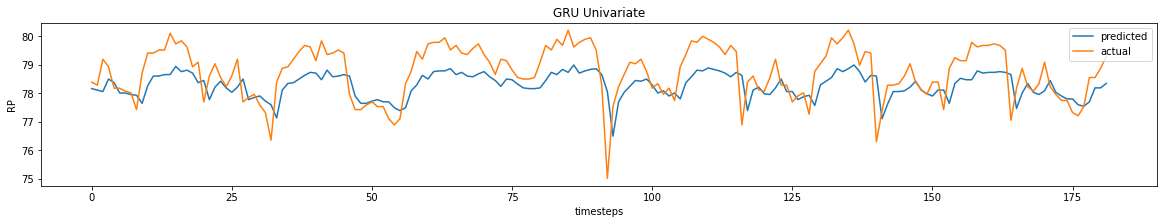

In [66]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('GRU Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [67]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [68]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],2)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mae', optimizer='adam')

print ('model compiled')

model compiled


In [69]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Epoch 1/20
3/3 [==============================] - 1s 384ms/step - loss: 0.6343 - val_loss: 0.6592
Epoch 2/20
3/3 [==============================] - 0s 35ms/step - loss: 0.5597 - val_loss: 0.5760
Epoch 3/20
3/3 [==============================] - 0s 34ms/step - loss: 0.4808 - val_loss: 0.4851
Epoch 4/20
3/3 [==============================] - 0s 36ms/step - loss: 0.3927 - val_loss: 0.3837
Epoch 5/20
3/3 [==============================] - 0s 32ms/step - loss: 0.2944 - val_loss: 0.2685
Epoch 6/20
3/3 [==============================] - 0s 34ms/step - loss: 0.1874 - val_loss: 0.1400
Epoch 7/20
3/3 [==============================] - 0s 30ms/step - loss: 0.1040 - val_loss: 0.0571
Epoch 8/20
3/3 [==============================] - 0s 34ms/step - loss: 0.1083 - val_loss: 0.0933
Epoch 9/20
3/3 [==============================] - 0s 32ms/step - loss: 0.1419 - val_loss: 0.0870
Epoch 10/20
3/3 [==============================] - 0s 34ms/step - loss: 0.1318 - val_loss: 0.0581
Epoch 11/20
3/3 [===========

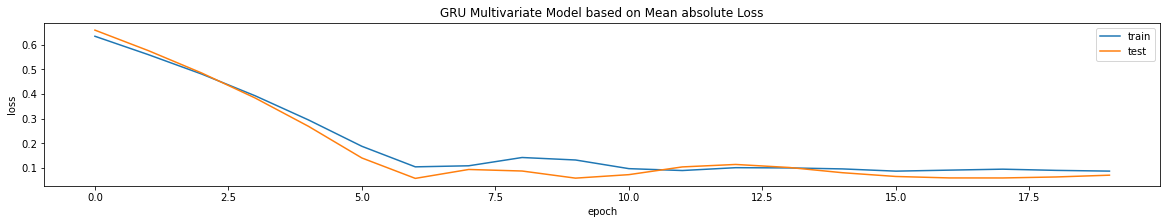

In [70]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Multivariate Model based on Mean absolute Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [71]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_GRU_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('GRU_Multivariate_MAE (When loss=mae)')
v1.append(mae_GRU_multivariate)
name1.append('GRU_Multivariate_MSE (When loss=mae)')
v1.append(mae_GRU_multivariate1)
print('Test MAE: %.5f' % mae_GRU_multivariate)
print('Test MSE: %.5f' % mae_GRU_multivariate1)


Test MAE: 0.52590
Test MSE: 0.43205


In [72]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [73]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],2)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

model compiled


In [74]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Epoch 1/20
3/3 [==============================] - 1s 410ms/step - loss: 0.4441 - val_loss: 0.4593
Epoch 2/20
3/3 [==============================] - 0s 35ms/step - loss: 0.3434 - val_loss: 0.3498
Epoch 3/20
3/3 [==============================] - 0s 34ms/step - loss: 0.2563 - val_loss: 0.2522
Epoch 4/20
3/3 [==============================] - 0s 35ms/step - loss: 0.1764 - val_loss: 0.1666
Epoch 5/20
3/3 [==============================] - 0s 34ms/step - loss: 0.1122 - val_loss: 0.0952
Epoch 6/20
3/3 [==============================] - 0s 34ms/step - loss: 0.0592 - val_loss: 0.0429
Epoch 7/20
3/3 [==============================] - 0s 33ms/step - loss: 0.0256 - val_loss: 0.0134
Epoch 8/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0140 - val_loss: 0.0059
Epoch 9/20
3/3 [==============================] - 0s 37ms/step - loss: 0.0186 - val_loss: 0.0104
Epoch 10/20
3/3 [==============================] - 0s 37ms/step - loss: 0.0271 - val_loss: 0.0131
Epoch 11/20
3/3 [===========

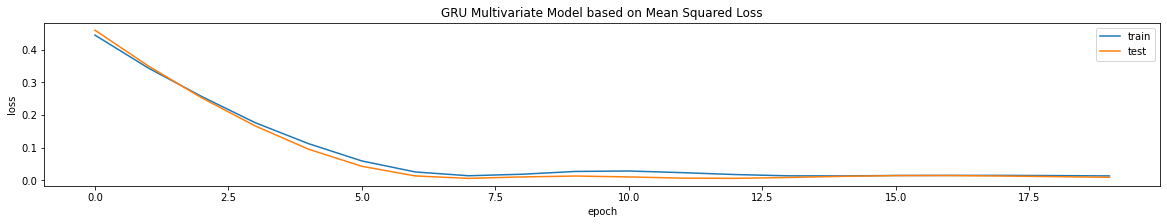

In [75]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Multivariate Model based on Mean Squared Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [76]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_GRU_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('GRU_Multivariate_MAE (When loss=mse)')
v1.append(mae_GRU_multivariate)
name1.append('GRU_Multivariate_MSE (When loss=mse)')
v1.append(mae_GRU_multivariate1)
print('Test MAE: %.5f' % mae_GRU_multivariate)
print('Test MSE: %.5f' % mae_GRU_multivariate1)



Test MAE: 0.59243
Test MSE: 0.51937


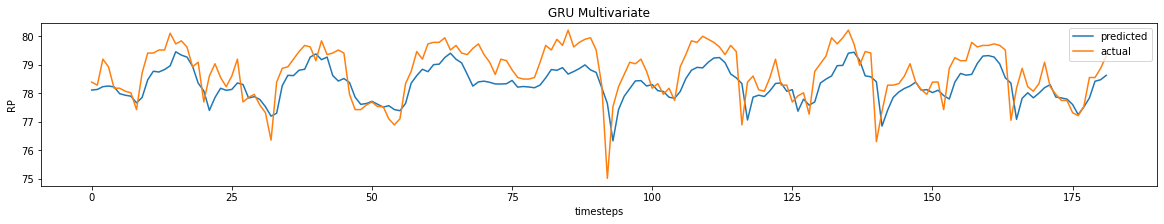

In [77]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('GRU Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# RBFN


## Univariate

In [78]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [79]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [80]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mae', optimizer='adam')

In [81]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 0s - loss: 1.1461 - val_loss: 1.0950
Epoch 2/20
18/18 - 0s - loss: 0.9450 - val_loss: 0.8986
Epoch 3/20
18/18 - 0s - loss: 0.7446 - val_loss: 0.7031
Epoch 4/20
18/18 - 0s - loss: 0.5452 - val_loss: 0.5088
Epoch 5/20
18/18 - 0s - loss: 0.3495 - val_loss: 0.3199
Epoch 6/20
18/18 - 0s - loss: 0.1816 - val_loss: 0.1667
Epoch 7/20
18/18 - 0s - loss: 0.1177 - val_loss: 0.1162
Epoch 8/20
18/18 - 0s - loss: 0.1209 - val_loss: 0.1123
Epoch 9/20
18/18 - 0s - loss: 0.1219 - val_loss: 0.1149
Epoch 10/20
18/18 - 0s - loss: 0.1196 - val_loss: 0.1155
Epoch 11/20
18/18 - 0s - loss: 0.1176 - val_loss: 0.1134
Epoch 12/20
18/18 - 0s - loss: 0.1167 - val_loss: 0.1123
Epoch 13/20
18/18 - 0s - loss: 0.1156 - val_loss: 0.1116
Epoch 14/20
18/18 - 0s - loss: 0.1142 - val_loss: 0.1106
Epoch 15/20
18/18 - 0s - loss: 0.1130 - val_loss: 0.1098
Epoch 16/20
18/18 - 0s - loss: 0.1117 - val_loss: 0.1088
Epoch 17/20
18/18 - 0s - loss: 0.1104 - val_loss: 0.1078
Epoch 18/20
18/18 - 0s - loss: 0.1091 - 

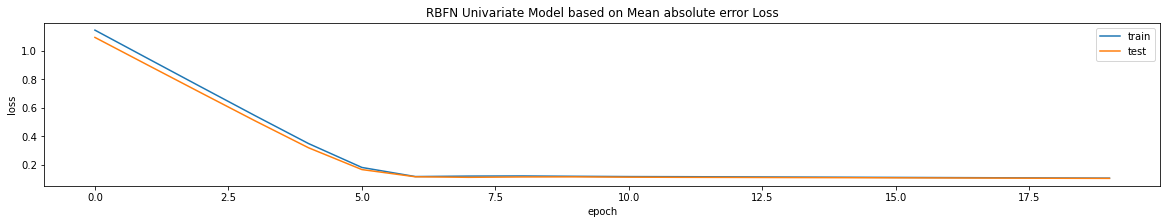

In [82]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Univariate Model based on Mean absolute error Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [83]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [84]:
# calculate RMSE
mae_RBFN_univariate = mean_absolute_error(inv_y, inv_yhat)
mae_RBFN_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('RBFN_Univariate_MAE (When loss=mae)')
v.append(mae_RBFN_univariate)
name.append('RBNF_Univariate_MSE (When loss=mae)')
v.append(mae_RBFN_univariate1)
print('Test MAE: %.5f' % mae_RBFN_univariate)
print('Test MSE: %.5f' % mae_RBFN_univariate1)



Test MAE: 0.78615
Test MSE: 0.88092


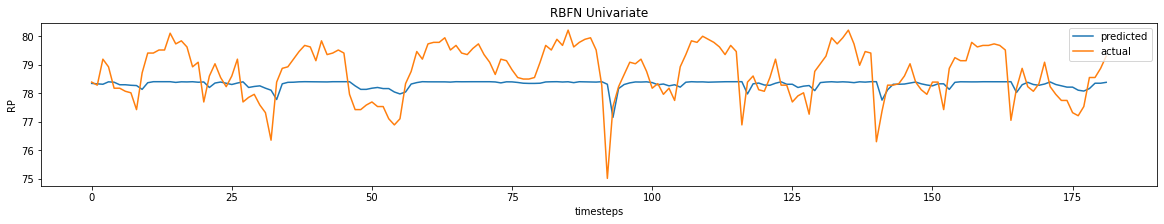

In [85]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('RBFN Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

In [86]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam')

In [87]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 0s - loss: 0.1777 - val_loss: 0.1627
Epoch 2/20
18/18 - 0s - loss: 0.0704 - val_loss: 0.0709
Epoch 3/20
18/18 - 0s - loss: 0.0363 - val_loss: 0.0387
Epoch 4/20
18/18 - 0s - loss: 0.0332 - val_loss: 0.0306
Epoch 5/20
18/18 - 0s - loss: 0.0345 - val_loss: 0.0294
Epoch 6/20
18/18 - 0s - loss: 0.0345 - val_loss: 0.0297
Epoch 7/20
18/18 - 0s - loss: 0.0340 - val_loss: 0.0298
Epoch 8/20
18/18 - 0s - loss: 0.0334 - val_loss: 0.0294
Epoch 9/20
18/18 - 0s - loss: 0.0329 - val_loss: 0.0289
Epoch 10/20
18/18 - 0s - loss: 0.0324 - val_loss: 0.0285
Epoch 11/20
18/18 - 0s - loss: 0.0319 - val_loss: 0.0280
Epoch 12/20
18/18 - 0s - loss: 0.0314 - val_loss: 0.0275
Epoch 13/20
18/18 - 0s - loss: 0.0308 - val_loss: 0.0271
Epoch 14/20
18/18 - 0s - loss: 0.0303 - val_loss: 0.0266
Epoch 15/20
18/18 - 0s - loss: 0.0298 - val_loss: 0.0262
Epoch 16/20
18/18 - 0s - loss: 0.0292 - val_loss: 0.0257
Epoch 17/20
18/18 - 0s - loss: 0.0287 - val_loss: 0.0253
Epoch 18/20
18/18 - 0s - loss: 0.0282 - 

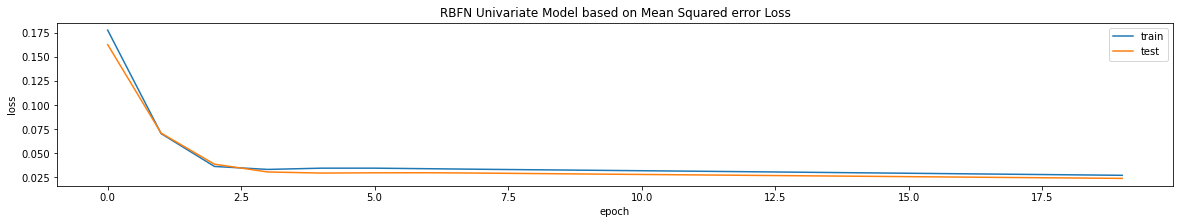

In [88]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Univariate Model based on Mean Squared error Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [89]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [90]:
# calculate RMSE
mae_RBFN_univariate = mean_absolute_error(inv_y, inv_yhat)
mae_RBFN_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('RBFN_Univariate_MAE (When loss=mse)')
v.append(mae_RBFN_univariate)
name.append('RBNF_Univariate_MSE (When loss=mse)')
v.append(mae_RBFN_univariate1)
print('Test MAE: %.5f' % mae_RBFN_univariate)
print('Test MSE: %.5f' % mae_RBFN_univariate1)

Test MAE: 0.96423
Test MSE: 1.34601


## Multivariate

(1200, 1, 2) (1200,) (182, 1, 2) (182,)
Epoch 1/20
18/18 - 0s - loss: 0.2325 - val_loss: 0.2121
Epoch 2/20
18/18 - 0s - loss: 0.2183 - val_loss: 0.2055
Epoch 3/20
18/18 - 0s - loss: 0.2146 - val_loss: 0.1996
Epoch 4/20
18/18 - 0s - loss: 0.2112 - val_loss: 0.1956
Epoch 5/20
18/18 - 0s - loss: 0.2073 - val_loss: 0.1918
Epoch 6/20
18/18 - 0s - loss: 0.2033 - val_loss: 0.1882
Epoch 7/20
18/18 - 0s - loss: 0.1993 - val_loss: 0.1849
Epoch 8/20
18/18 - 0s - loss: 0.1951 - val_loss: 0.1811
Epoch 9/20
18/18 - 0s - loss: 0.1911 - val_loss: 0.1773
Epoch 10/20
18/18 - 0s - loss: 0.1870 - val_loss: 0.1732
Epoch 11/20
18/18 - 0s - loss: 0.1830 - val_loss: 0.1694
Epoch 12/20
18/18 - 0s - loss: 0.1790 - val_loss: 0.1656
Epoch 13/20
18/18 - 0s - loss: 0.1749 - val_loss: 0.1617
Epoch 14/20
18/18 - 0s - loss: 0.1711 - val_loss: 0.1582
Epoch 15/20
18/18 - 0s - loss: 0.1670 - val_loss: 0.1546
Epoch 16/20
18/18 - 0s - loss: 0.1631 - val_loss: 0.1510
Epoch 17/20
18/18 - 0s - loss: 0.1591 - val_loss: 0.1474


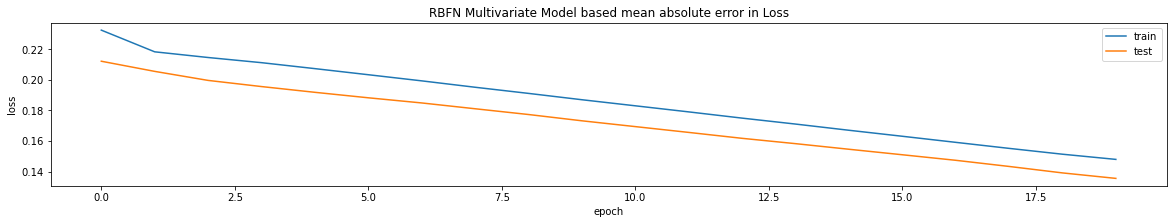

Test MAE: 1.01639
Test MSE: 1.54860


In [91]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mae', optimizer='adam')


# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Multivariate Model based mean absolute error in Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

mae_RBFN_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_RBFN_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('RBFN_Multivariate_MAE (When loss=mae)')
v1.append(mae_RBFN_multivariate)
name1.append('RBNF_Multivariate_MSE (When loss=mae)')
v1.append(mae_RBFN_multivariate1)
print('Test MAE: %.5f' % mae_RBFN_multivariate)
print('Test MSE: %.5f' % mae_RBFN_multivariate1)


In [92]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [93]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam')

In [94]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 0s - loss: 0.1702 - val_loss: 0.1582
Epoch 2/20
18/18 - 0s - loss: 0.0713 - val_loss: 0.0743
Epoch 3/20
18/18 - 0s - loss: 0.0422 - val_loss: 0.0460
Epoch 4/20
18/18 - 0s - loss: 0.0403 - val_loss: 0.0392
Epoch 5/20
18/18 - 0s - loss: 0.0410 - val_loss: 0.0381
Epoch 6/20
18/18 - 0s - loss: 0.0403 - val_loss: 0.0379
Epoch 7/20
18/18 - 0s - loss: 0.0391 - val_loss: 0.0373
Epoch 8/20
18/18 - 0s - loss: 0.0380 - val_loss: 0.0364
Epoch 9/20
18/18 - 0s - loss: 0.0369 - val_loss: 0.0353
Epoch 10/20
18/18 - 0s - loss: 0.0359 - val_loss: 0.0342
Epoch 11/20
18/18 - 0s - loss: 0.0349 - val_loss: 0.0332
Epoch 12/20
18/18 - 0s - loss: 0.0338 - val_loss: 0.0322
Epoch 13/20
18/18 - 0s - loss: 0.0328 - val_loss: 0.0312
Epoch 14/20
18/18 - 0s - loss: 0.0317 - val_loss: 0.0302
Epoch 15/20
18/18 - 0s - loss: 0.0307 - val_loss: 0.0292
Epoch 16/20
18/18 - 0s - loss: 0.0297 - val_loss: 0.0283
Epoch 17/20
18/18 - 0s - loss: 0.0288 - val_loss: 0.0273
Epoch 18/20
18/18 - 0s - loss: 0.0278 - 

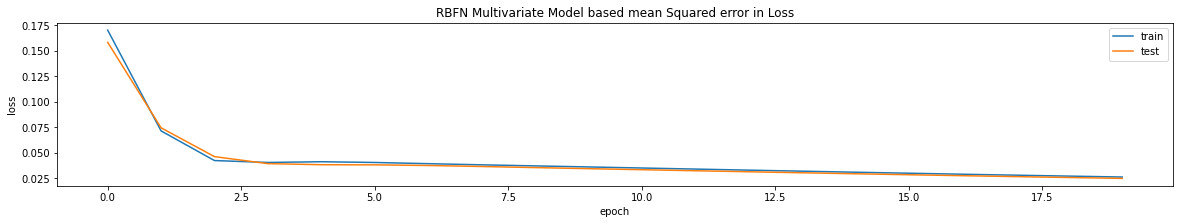

In [95]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Multivariate Model based mean Squared error in Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [96]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

In [97]:
mae_RBFN_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_RBFN_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('RBFN_Multivariate_MAE (When loss=mse)')
v1.append(mae_RBFN_multivariate)
name1.append('RBNF_Multivariate_MSE (When loss=mse)')
v1.append(mae_RBFN_multivariate1)
print('Test MAE: %.5f' % mae_RBFN_multivariate)
print('Test MSE: %.5f' % mae_RBFN_multivariate1)

Test MAE: 0.96395
Test MSE: 1.38795


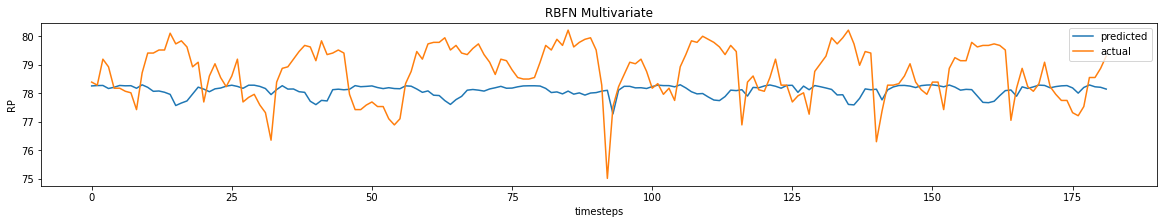

In [98]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('RBFN Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# LSTM

## Univariate

In [99]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [100]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [101]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 1s - loss: 0.5635 - val_loss: 0.5590
Epoch 2/20
18/18 - 0s - loss: 0.4116 - val_loss: 0.3828
Epoch 3/20
18/18 - 0s - loss: 0.2335 - val_loss: 0.1707
Epoch 4/20
18/18 - 0s - loss: 0.0877 - val_loss: 0.0655
Epoch 5/20
18/18 - 0s - loss: 0.0930 - val_loss: 0.0710
Epoch 6/20
18/18 - 0s - loss: 0.0872 - val_loss: 0.0734
Epoch 7/20
18/18 - 0s - loss: 0.0861 - val_loss: 0.0725
Epoch 8/20
18/18 - 0s - loss: 0.0862 - val_loss: 0.0708
Epoch 9/20
18/18 - 0s - loss: 0.0847 - val_loss: 0.0693
Epoch 10/20
18/18 - 0s - loss: 0.0858 - val_loss: 0.0687
Epoch 11/20
18/18 - 0s - loss: 0.0847 - val_loss: 0.0691
Epoch 12/20
18/18 - 0s - loss: 0.0815 - val_loss: 0.0683
Epoch 13/20
18/18 - 0s - loss: 0.0843 - val_loss: 0.0688
Epoch 14/20
18/18 - 0s - loss: 0.0812 - val_loss: 0.0678
Epoch 15/20
18/18 - 0s - loss: 0.0821 - val_loss: 0.0664
Epoch 16/20
18/18 - 0s - loss: 0.0809 - val_loss: 0.0655
Epoch 17/20
18/18 - 0s - loss: 0.0810 - val_loss: 0.0666
Epoch 18/20
18/18 - 0s - loss: 0.0816 - 

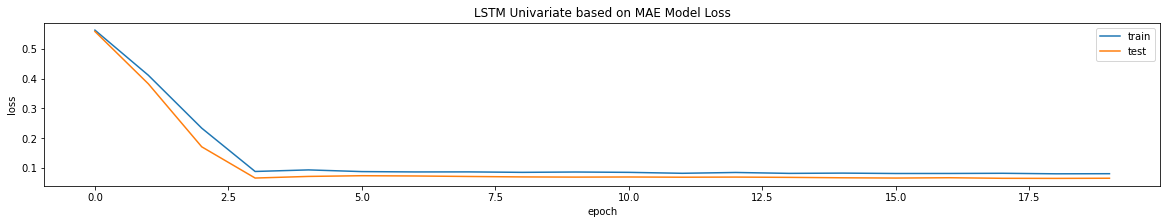

In [102]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Univariate based on MAE Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [103]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
lstm_mae_lstm_univariate = mean_absolute_error(inv_y, inv_yhat)
lstm_mae_lstm_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('LSTM_Univariate_MAE (When loss=mae)')
v.append(lstm_mae_lstm_univariate)
name.append('LSTM_Univariate_MSE (When loss=mae)')
v.append(lstm_mae_lstm_univariate1)
print('Test MAE: %.5f' % lstm_mae_lstm_univariate)
print('Test MSE: %.5f' % lstm_mae_lstm_univariate1)

Test MAE: 0.48675
Test MSE: 0.43332


(1200, 1, 1) (1200,) (182, 1, 1) (182,)
Epoch 1/20
18/18 - 1s - loss: 0.3534 - val_loss: 0.3508
Epoch 2/20
18/18 - 0s - loss: 0.2115 - val_loss: 0.1981
Epoch 3/20
18/18 - 0s - loss: 0.1020 - val_loss: 0.0825
Epoch 4/20
18/18 - 0s - loss: 0.0329 - val_loss: 0.0234
Epoch 5/20
18/18 - 0s - loss: 0.0130 - val_loss: 0.0096
Epoch 6/20
18/18 - 0s - loss: 0.0127 - val_loss: 0.0088
Epoch 7/20
18/18 - 0s - loss: 0.0130 - val_loss: 0.0093
Epoch 8/20
18/18 - 0s - loss: 0.0135 - val_loss: 0.0096
Epoch 9/20
18/18 - 0s - loss: 0.0126 - val_loss: 0.0095
Epoch 10/20
18/18 - 0s - loss: 0.0125 - val_loss: 0.0094
Epoch 11/20
18/18 - 0s - loss: 0.0128 - val_loss: 0.0093
Epoch 12/20
18/18 - 0s - loss: 0.0125 - val_loss: 0.0092
Epoch 13/20
18/18 - 0s - loss: 0.0122 - val_loss: 0.0091
Epoch 14/20
18/18 - 0s - loss: 0.0121 - val_loss: 0.0090
Epoch 15/20
18/18 - 0s - loss: 0.0126 - val_loss: 0.0089
Epoch 16/20
18/18 - 0s - loss: 0.0124 - val_loss: 0.0091
Epoch 17/20
18/18 - 0s - loss: 0.0120 - val_loss: 0.0090


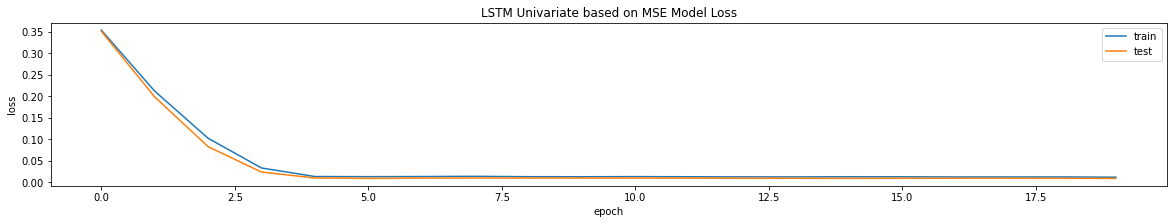

Test MAE: 0.55713
Test MSE: 0.48886


In [104]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Univariate based on MSE Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
lstm_mae_lstm_univariate = mean_absolute_error(inv_y, inv_yhat)
lstm_mae_lstm_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('LSTM_Univariate_MAE (When loss=mse)')
v.append(lstm_mae_lstm_univariate)
name.append('LSTM_Univariate_MSE (When loss=mse)')
v.append(lstm_mae_lstm_univariate1)
print('Test MAE: %.5f' % lstm_mae_lstm_univariate)
print('Test MSE: %.5f' % lstm_mae_lstm_univariate1)



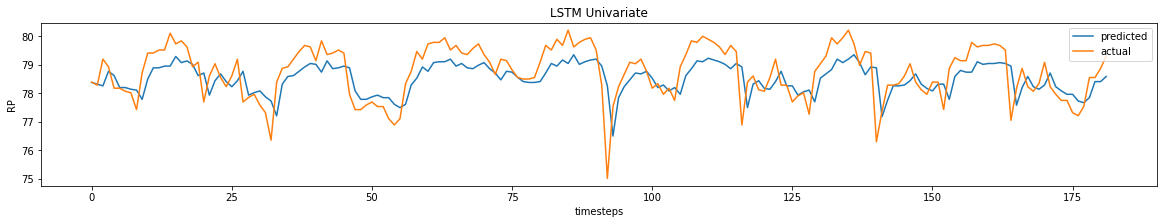

In [105]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('LSTM Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [106]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [107]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [108]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 1s - loss: 0.5991 - val_loss: 0.5804
Epoch 2/20
18/18 - 0s - loss: 0.4150 - val_loss: 0.3675
Epoch 3/20
18/18 - 0s - loss: 0.1970 - val_loss: 0.1059
Epoch 4/20
18/18 - 0s - loss: 0.0777 - val_loss: 0.0566
Epoch 5/20
18/18 - 0s - loss: 0.0967 - val_loss: 0.0667
Epoch 6/20
18/18 - 0s - loss: 0.0872 - val_loss: 0.0620
Epoch 7/20
18/18 - 0s - loss: 0.0856 - val_loss: 0.0592
Epoch 8/20
18/18 - 0s - loss: 0.0892 - val_loss: 0.0609
Epoch 9/20
18/18 - 0s - loss: 0.0870 - val_loss: 0.0612
Epoch 10/20
18/18 - 0s - loss: 0.0878 - val_loss: 0.0619
Epoch 11/20
18/18 - 0s - loss: 0.0848 - val_loss: 0.0590
Epoch 12/20
18/18 - 0s - loss: 0.0865 - val_loss: 0.0611
Epoch 13/20
18/18 - 0s - loss: 0.0835 - val_loss: 0.0583
Epoch 14/20
18/18 - 0s - loss: 0.0861 - val_loss: 0.0610
Epoch 15/20
18/18 - 0s - loss: 0.0827 - val_loss: 0.0571
Epoch 16/20
18/18 - 0s - loss: 0.0868 - val_loss: 0.0603
Epoch 17/20
18/18 - 0s - loss: 0.0828 - val_loss: 0.0588
Epoch 18/20
18/18 - 0s - loss: 0.0833 - 

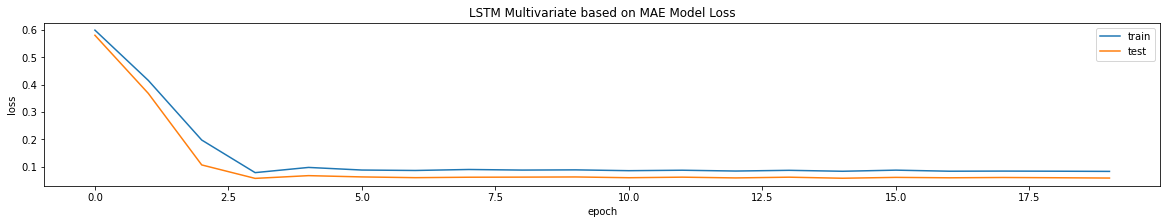

In [109]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Multivariate based on MAE Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [110]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_LSTM_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_LSTM_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('LSTM_Multivariate_MAE (When loss=mae)')
v1.append(mae_LSTM_multivariate)
name1.append('LSTM_Multivariate_MSE (When loss=mae)')
v1.append(mae_LSTM_multivariate1)
print('Test MAE: %.5f' % mae_LSTM_multivariate)
print('Test MSE: %.5f' % mae_LSTM_multivariate1)


Test MAE: 0.43390
Test MSE: 0.34877


(1200, 1, 2) (1200,) (182, 1, 2) (182,)
Epoch 1/20
18/18 - 1s - loss: 0.3507 - val_loss: 0.3186
Epoch 2/20
18/18 - 0s - loss: 0.1711 - val_loss: 0.1343
Epoch 3/20
18/18 - 0s - loss: 0.0537 - val_loss: 0.0312
Epoch 4/20
18/18 - 0s - loss: 0.0111 - val_loss: 0.0069
Epoch 5/20
18/18 - 0s - loss: 0.0108 - val_loss: 0.0060
Epoch 6/20
18/18 - 0s - loss: 0.0116 - val_loss: 0.0069
Epoch 7/20
18/18 - 0s - loss: 0.0110 - val_loss: 0.0072
Epoch 8/20
18/18 - 0s - loss: 0.0112 - val_loss: 0.0070
Epoch 9/20
18/18 - 0s - loss: 0.0111 - val_loss: 0.0070
Epoch 10/20
18/18 - 0s - loss: 0.0113 - val_loss: 0.0068
Epoch 11/20
18/18 - 0s - loss: 0.0107 - val_loss: 0.0070
Epoch 12/20
18/18 - 0s - loss: 0.0109 - val_loss: 0.0071
Epoch 13/20
18/18 - 0s - loss: 0.0109 - val_loss: 0.0069
Epoch 14/20
18/18 - 0s - loss: 0.0114 - val_loss: 0.0069
Epoch 15/20
18/18 - 0s - loss: 0.0106 - val_loss: 0.0067
Epoch 16/20
18/18 - 0s - loss: 0.0107 - val_loss: 0.0068
Epoch 17/20
18/18 - 0s - loss: 0.0106 - val_loss: 0.0068


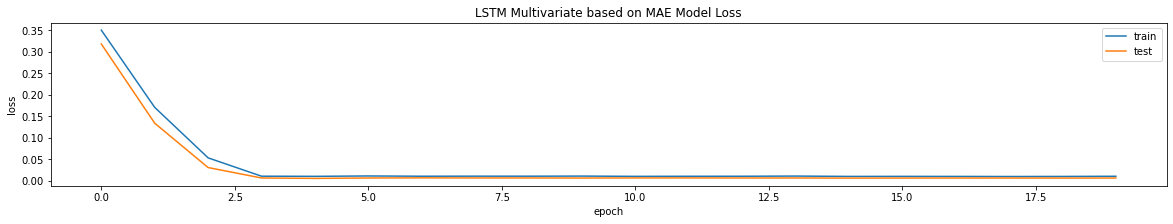

Test MAE: 0.46885
Test MSE: 0.38271


In [111]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Multivariate based on MAE Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_LSTM_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_LSTM_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('LSTM_Multivariate_MAE (When loss=mse)')
v1.append(mae_LSTM_multivariate)
name1.append('LSTM_Multivariate_MSE (When loss=mse)')
v1.append(mae_LSTM_multivariate1)
print('Test MAE: %.5f' % mae_LSTM_multivariate)
print('Test MSE: %.5f' % mae_LSTM_multivariate1)


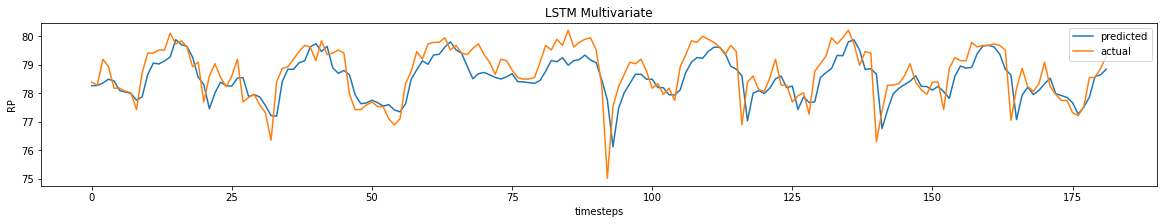

In [112]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('LSTM Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# ARIMA

# Univariate

In [113]:
!pip install statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [114]:
# Define the p, d and q parameters to take any value between 0 and 2
p=d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [115]:
# parameters ARIMA(1, 0, 0)x(1, 1, 1, 12)
mod = sm.tsa.statespace.SARIMAX(nov_apr_resample['RP'],
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7411      0.017     42.709      0.000       0.707       0.775
ar.S.L12      -0.1775      0.023     -7.863      0.000      -0.222      -0.133
ma.S.L12      -0.9628      0.007   -128.410      0.000      -0.978      -0.948
sigma2         1.2032      0.030     39.708      0.000       1.144       1.263


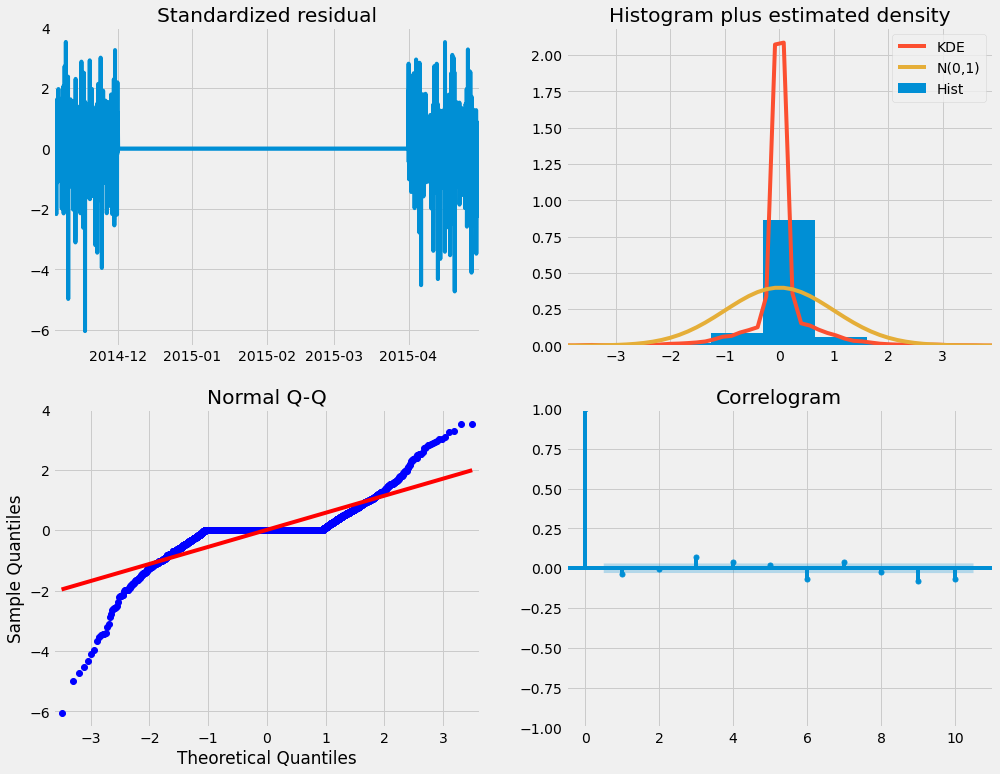

In [116]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [117]:
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

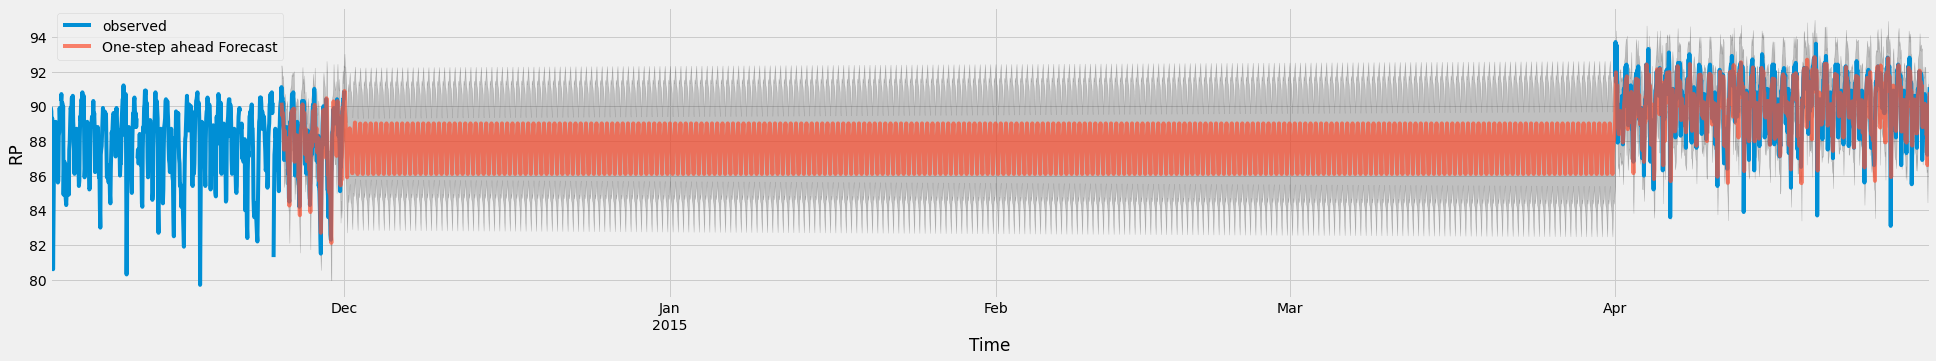

In [118]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
ax = nov_apr_resample['RP'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('RP')
plt.legend()

plt.show()

In [119]:
y_forecasted = pred.predicted_mean
y_truth = nov_apr_resample['RP']['2014-11-25':]

In [120]:
ARIMA_univariate_nov_apr_mse= (abs(y_truth - y_forecasted)).mean()

In [121]:
y_forecasted.astype("float")

time_corrected
2014-11-25 00:00:00    90.203091
2014-11-25 01:00:00    89.906825
2014-11-25 02:00:00    89.447907
2014-11-25 03:00:00    89.619796
2014-11-25 04:00:00    89.286124
                         ...    
2015-04-30 19:00:00    89.161969
2015-04-30 20:00:00    88.760633
2015-04-30 21:00:00    89.877375
2015-04-30 22:00:00    90.115002
2015-04-30 23:00:00    90.807066
Freq: H, Length: 3768, dtype: float64

In [122]:
name.append('Arima univariate model MAE')
v.append(ARIMA_univariate_nov_apr_mse)
print("Arima univariate model MAE",ARIMA_univariate_nov_apr_mse)

Arima univariate model MAE 0.7978299882112241


In [123]:
MSE=mse=np.mean((abs(y_truth - y_forecasted))**2)
name.append('Arima univariate model MSE')
v.append(MSE)
print("MSE is :",MSE)

MSE is : 1.206896768628151


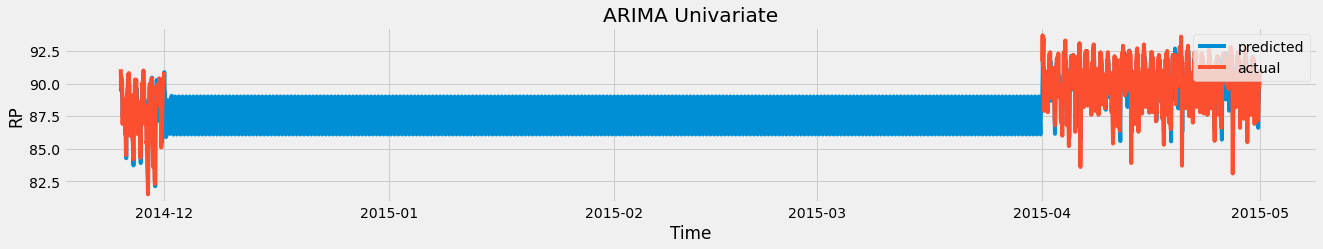

In [124]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(y_forecasted)
plt.plot(y_truth)
plt.title('ARIMA Univariate')
plt.ylabel('RP')
plt.xlabel('Time')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# Multivariate


In [125]:
train =nov_apr_resample.loc[:,'RP']
exog = nov_apr_resample.loc[:,'traffic information']

In [126]:
exog = exog.replace([np.inf, -np.inf], np.nan).fillna(0) 

In [127]:
mod = sm.tsa.statespace.SARIMAX(train, exog=exog.astype('float64'), trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary().tables[1])

                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
traffic information     0.5751      0.041     14.096      0.000       0.495       0.655
ar.S.L12               -0.0459      0.027     -1.719      0.086      -0.098       0.006
ma.S.L12               -0.9885      0.005   -217.317      0.000      -0.997      -0.980
sigma2                  1.2700      0.030     42.029      0.000       1.211       1.329


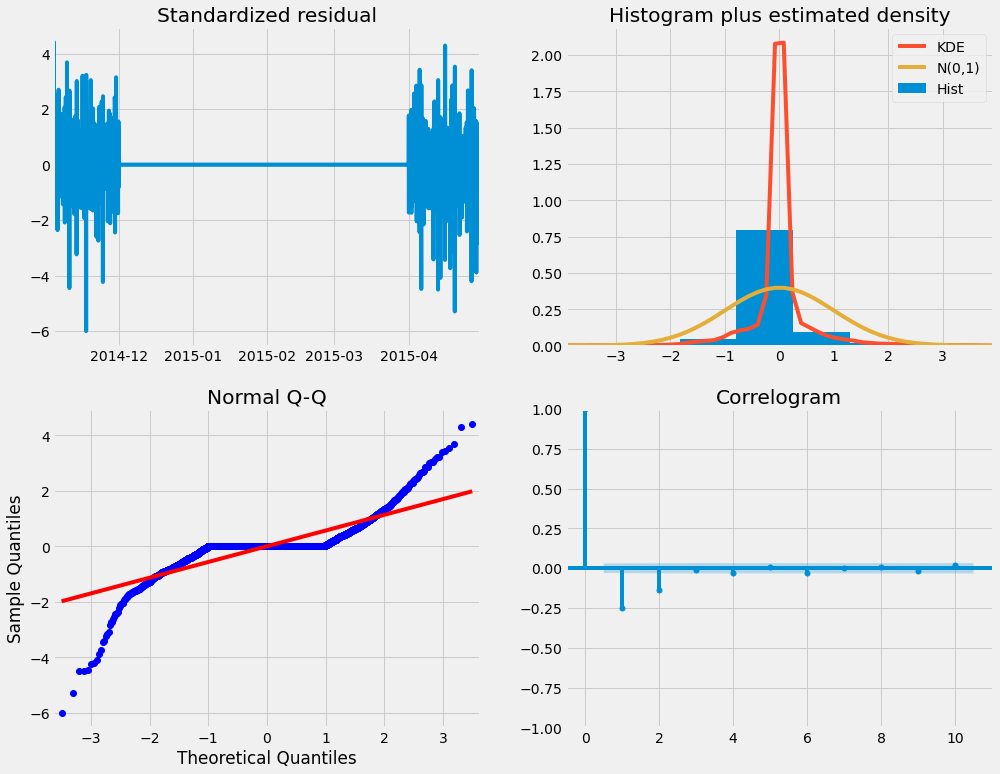

In [128]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [129]:
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

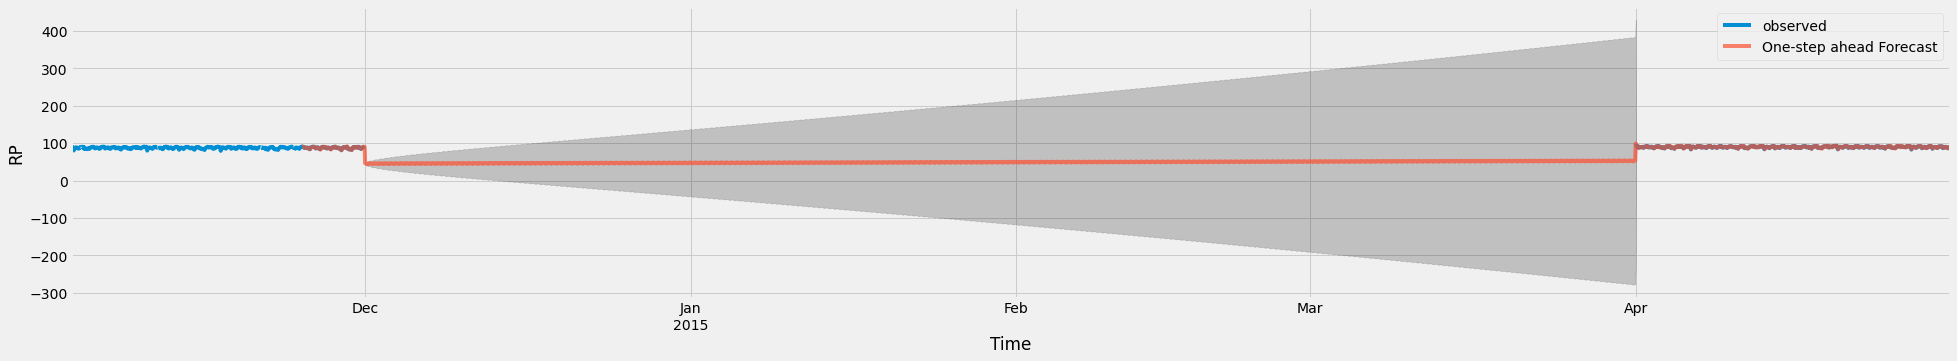

In [130]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
ax = nov_apr_resample['RP'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('RP')
plt.legend()

plt.show()

In [131]:
exog_forecast = nov_apr_resample.loc['2014-11-25':,'traffic information']
exog_forecast = exog_forecast.replace([np.inf, -np.inf], np.nan).fillna(0) 
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'),exog=exog_forecast, dynamic=False)

In [132]:
y_forecasted = pred.predicted_mean
y_truth = nov_apr_resample['RP']['2014-11-25':]

In [133]:
mae_arima_multivariate = abs(y_truth-y_forecasted).mean()

In [134]:
y_forecasted.astype("float")

time_corrected
2014-11-25 00:00:00    90.631825
2014-11-25 01:00:00    90.849511
2014-11-25 02:00:00    89.977929
2014-11-25 03:00:00    90.028813
2014-11-25 04:00:00    89.611529
                         ...    
2015-04-30 19:00:00    89.346531
2015-04-30 20:00:00    88.469057
2015-04-30 21:00:00    90.006060
2015-04-30 22:00:00    89.963483
2015-04-30 23:00:00    90.655926
Freq: H, Length: 3768, dtype: float64

In [135]:
name1.append('Arima Multivariate model MAE')
v1.append(mae_arima_multivariate)
print("Arima Multivariate model MAE",mae_arima_multivariate)

Arima Multivariate model MAE 0.8033551863205933


In [136]:
MSE=mse=np.mean((abs(y_truth - y_forecasted))**2)
name1.append('Arima Multivariate model MSE')
v1.append(MSE)
print("MSE is :",MSE)

MSE is : 1.3127680377918827


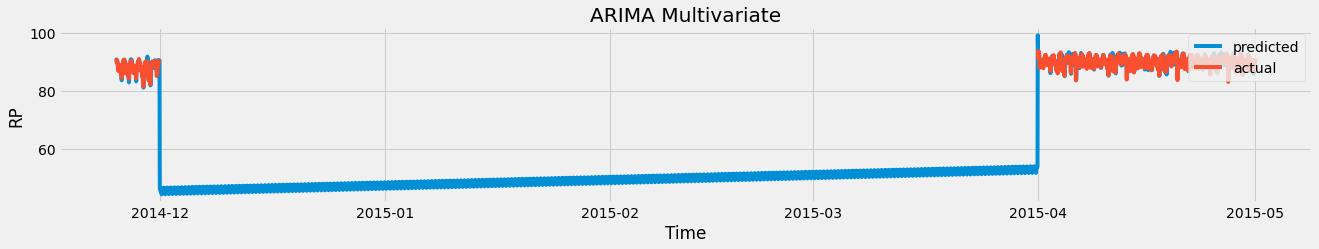

In [137]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(y_forecasted)
plt.plot(y_truth)
plt.title('ARIMA Multivariate')
plt.ylabel('RP')
plt.xlabel('Time')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

In [138]:
import pandas as pd
df=pd.DataFrame({'Models Type':name,'Models Error values':v})

In [139]:
dff=pd.DataFrame({'Models Type':name1,'Models Error values':v1})

In [141]:
import plotly as px

In [149]:
import plotly.express as px
fig = px.bar(df, x='Models Type', y='Models Error values',color='Models Error values',title="Univariate analysis")
fig.show()

In [151]:
import plotly.express as px
fig = px.bar(dff, x='Models Type', y='Models Error values',color='Models Error values',title="Multivariate analysis")
fig.show()